# Clasificacion y explicabilidad

## Explicabilidad

AAE para entrenar un espacio latente para explicar el resultado de la clasificacion.

### Preparacion de los datos

In [4]:
from lib.utilities import unpickle, tryDataset, mkfolders, os, compute_mixture, load_mixture

(50000, 32, 32, 3)


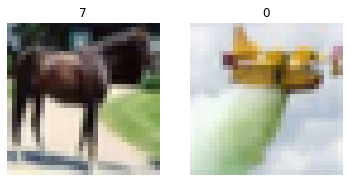

(10000, 32, 32, 3)


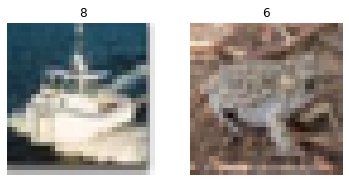

In [5]:
X_train = unpickle("Input\cifar-10-train")
X_test = unpickle("Input\cifar-10-test")
tryDataset(X_train)
tryDataset(X_test)

Tamaño de las imagenes:

In [3]:
img_shape = X_train["data"][0].shape

### Entrenamiento

#### Persistencia

In [4]:
_raiz = "Resultados/CIFAR10_ClasifExpl"
_nombre = "CIFAR10"

Creamos las carpetas para almacenar el output

In [5]:
mkfolders(_raiz, True)

Carpeta Resultados/CIFAR10_ClasifExpl ya existe


#### Entrenamiento en grid

In [6]:
from lib.discriminadores import build_class_discriminator
from lib.genEJ import true_multivariate_sampler_tf, fake_class_sampler
from keras import losses

In [7]:
from lib.compilado import assemble_AAE_twoPhased
from lib.entrenamiento import fit_AAE_twoPhased
from lib.convolucional import build_conv_decoder, build_conv_encoder
from lib.muestreo import show_prevResults, plot_history, sample_imgs, exploraLatente

In [8]:
epochs = 12

In [9]:
def tryModel(
    model_name="MODEL", 
    assemble_AAE=assemble_AAE_twoPhased,
    loss_weights=[0.999, 0.001], 
    fit_AAE = fit_AAE_twoPhased,
    enc= (build_conv_encoder, "conv_enc", {}), 
    dec = (build_conv_decoder,"conv_dec", {}),
    ae_loss = (losses.mean_squared_error, "ae_MSE_loss"),
    disc = (build_class_discriminator ,"class_disc", {"clases":10}, {"truth":true_multivariate_sampler_tf, "truth_kwargs":{"nclases":10}, "falsehood":fake_class_sampler}),
    disc_loss = (losses.binary_crossentropy, "disc_binXentropy_loss"),
    dim_latente = 512,
    save=False
    ):
    # Carpeta donde almacenar los resultados
    ruta = _raiz+"\\"+model_name
    # Si existen los modelos solo mostrar resultados guardados sin entrenar
    if os.path.isfile(ruta+"/Modelos\\decoder.h5"):
        print(ruta+" ya ha sido entrenada")
        show_prevResults(ruta, epochs=epochs)
        return
    # Crear carpeta
    mkfolders(ruta, True)
    # Parametros para el entrenamiento
    fit_settings = disc[3]
    # Creacion de los modelos
    aae = assemble_AAE(dim_latente, img_shape, enc_model = enc[0], enc_kwargs=enc[2], dec_model = dec[0], dec_kwargs=dec[2], disc_model = disc[0], disc_kwargs=disc[2], ae_loss=ae_loss[0], disc_loss=disc_loss[0], loss_weights=loss_weights)
    # Entrenamiento
    history = fit_AAE(aae=aae, dim_latente=dim_latente, dataset=X_train, epochs = epochs, ruta = ruta, **fit_settings)
    # Obtenemos informacion del numero de clases para mostrar resultados
    clases=0
    if "clases" in disc[2].keys():
        clases=disc[2]["clases"]
    
    #Resultados
    print("Historia del entrenamiento:")
    plot_history(history, ruta=ruta, title=ruta)
    print("Imagenes regeneradas desde el set de entrenamiento (arriba originales):")
    sample_imgs(X_train, aae[3], epoch=epochs, nclases=clases, show=True, ruta=ruta, title=ruta+" regeneration", nombre="TRAINSET")
    print("Imagenes regeneradas desde imagenes nunca vistas por la red (arriba originales):")
    sample_imgs(X_test, aae[3], epoch=epochs, nclases=clases, show=True, ruta=ruta, title=ruta+" regeneration", nombre="TESTSET")
    print("Imagenes generadas desde una aproximacion a coordenadas del espacio latente (Train):")
    exploraLatente(aae[0], aae[1], "Input\cifar-10-groupedtrain", ruta=ruta, nombre="GenFromLatentTRAINSET")
    print("Imagenes generadas desde una aproximacion a coordenadas del espacio latente (Test):")
    exploraLatente(aae[0], aae[1], "Input\cifar-10-groupedtest", ruta=ruta, nombre="GenFromLatentTESTSET")
    # Guardado de modelos
    if save:
        mkfolders(ruta+"/Modelos")
        aae[0].save(ruta+"/Modelos\\encoder.h5")
        aae[1].save(ruta+"/Modelos\\decoder.h5")
        #aae[3].save(ruta+"/Modelos\\autoencoder.h5")


In [10]:
model_name = "ConvAAE"

Carpeta Resultados/CIFAR10_ClasifExpl\ConvAAE ya existe
Entrenando: Resultados/CIFAR10_ClasifExpl\ConvAAE
E0 <██████████> 100% DISC: [loss: 0.007432, acc: 100.00%] AAE: [mse: 0.019490, b_ce: 0.014402] 121.38s		
E1 <██████████> 100% DISC: [loss: 0.000788, acc: 100.00%] AAE: [mse: 0.022618, b_ce: 0.013948] 117.88s		
E2 <██████████> 100% DISC: [loss: 1.123926, acc: 61.00%] AAE: [mse: 0.014148, b_ce: 0.009873] 119.49s		
E3 <██████████> 100% DISC: [loss: 0.688870, acc: 81.50%] AAE: [mse: 0.017373, b_ce: 0.010996] 119.24s		
E4 <██████████> 100% DISC: [loss: 0.111204, acc: 95.00%] AAE: [mse: 0.016072, b_ce: 0.008514] 119.58s		
E5 <██████████> 100% DISC: [loss: 0.257337, acc: 94.00%] AAE: [mse: 0.016662, b_ce: 0.008504] 119.40s		
E6 <██████████> 100% DISC: [loss: 0.070661, acc: 93.00%] AAE: [mse: 0.015117, b_ce: 0.007990] 119.45s		
E7 <██████████> 100% DISC: [loss: 0.056589, acc: 98.00%] AAE: [mse: 0.015371, b_ce: 0.007063] 119.28s		
E8 <██████████> 100% DISC: [loss: 0.002324, acc: 100.00%] AA

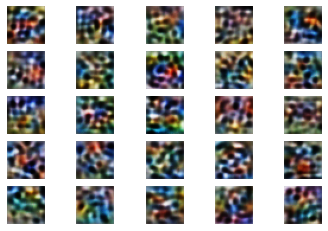

Historia del entrenamiento:


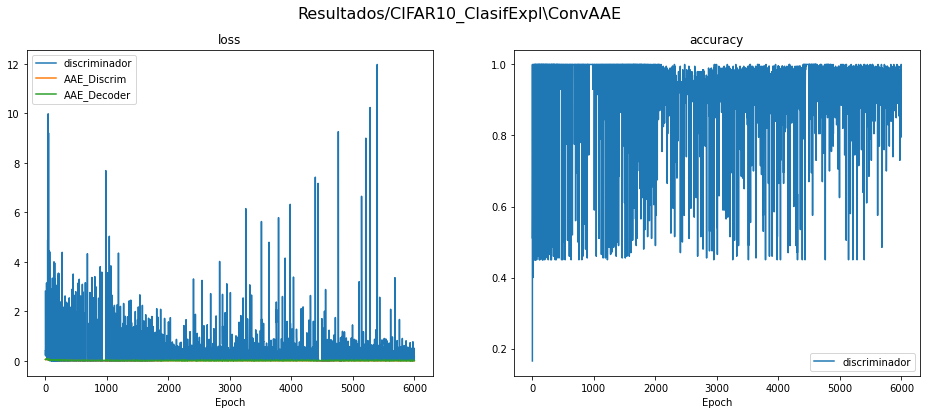

Imagenes regeneradas desde el set de entrenamiento (arriba originales):


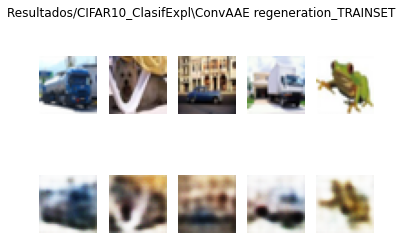

Imagenes regeneradas desde imagenes nunca vistas por la red (arriba originales):


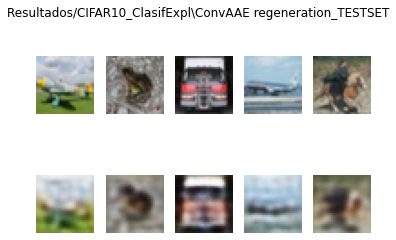

Imagenes generadas desde una aproximacion a coordenadas del espacio latente (Train):


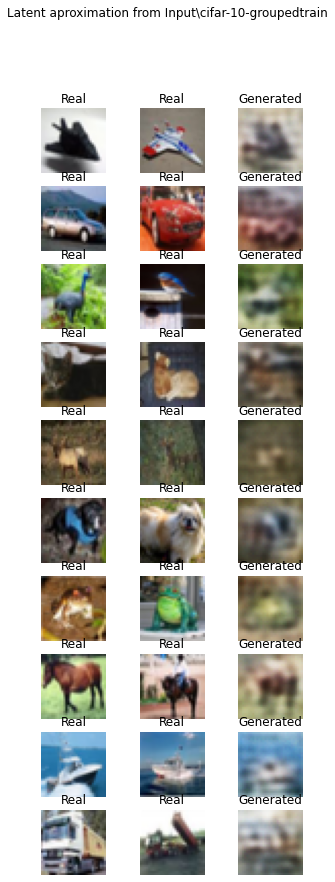

Imagenes generadas desde una aproximacion a coordenadas del espacio latente (Test):


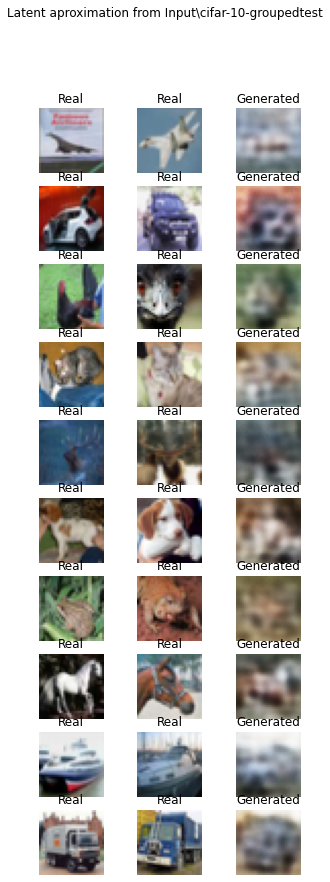

In [11]:
tryModel(model_name=model_name, save=True)

## Clasificacion   

Librerias

In [11]:
import tensorflow as tf
from keras import Sequential, regularizers
from keras.layers import Conv2D, Activation, BatchNormalization, MaxPooling2D, Dropout, Dense, Flatten
from lib.genEJ import onehotify


Datos

In [12]:
num_classes=10

x_train = X_train["data"]
y_train = onehotify(X_train["labels"], num_classes)

x_test = X_test["data"]
y_test = onehotify(X_test["labels"], num_classes)

### Modelo del clasificador [[Original](https://appliedmachinelearning.blog/2018/03/24/achieving-90-accuracy-in-object-recognition-task-on-cifar-10-dataset-with-keras-convolutional-neural-networks/)]

In [13]:
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))
 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                        

In [14]:
from keras.callbacks import LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator

Entrenamiento y data augmentation

In [15]:
#data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train)
 
#training
batch_size = 64

def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    if epoch > 100:
        lrate = 0.0003
    return lrate

opt_rms = tf.keras.optimizers.RMSprop(lr=0.001,decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])
model.fit(datagen.flow(x_train, y_train, batch_size=batch_size), steps_per_epoch=x_train.shape[0] // batch_size, epochs=125, verbose=1, validation_data=(x_test,y_test), callbacks=[LearningRateScheduler(lr_schedule)])

C:\Users\bitde\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/125
781/781 [==============================] - 25s 25ms/step - loss: 1.9493 - accuracy: 0.4071 - val_loss: 1.3694 - val_accuracy: 0.5569 - lr: 0.0010
Epoch 2/125
781/781 [==============================] - 19s 24ms/step - loss: 1.2795 - accuracy: 0.5802 - val_loss: 1.2146 - val_accuracy: 0.6359 - lr: 0.0010
Epoch 3/125
781/781 [==============================] - 19s 24ms/step - loss: 1.0825 - accuracy: 0.6505 - val_loss: 0.9219 - val_accuracy: 0.7133 - lr: 0.0010
Epoch 4/125
781/781 [==============================] - 19s 24ms/step - loss: 0.9836 - accuracy: 0.6849 - val_loss: 0.8958 - val_accuracy: 0.7273 - lr: 0.0010
Epoch 5/125
781/781 [==============================] - 19s 24ms/step - loss: 0.9225 - accuracy: 0.7091 - val_loss: 0.8919 - val_accuracy: 0.7336 - lr: 0.0010
Epoch 6/125
781/781 [==============================] - 19s 24ms/step - loss: 0.8706 - accuracy: 0.7331 - val_loss: 0.8178 - val_accuracy: 0.7643 - lr: 0.0010
Epoch 7/125
781/781 [==============================]

Guardado

In [17]:
model.save(_raiz+"\\"+model_name+"/Modelos\\clasifier.h5")

## Proceso

### Carga de datos

In [6]:
from lib.utilities import unpickle
X_train = unpickle("Input\cifar-10-train")
X_test = unpickle("Input\cifar-10-test")

### Carga del clasificador y el encoder

In [4]:
import keras
encoder = keras.models.load_model("Resultados/CIFAR10_ClasifExpl/ConvAAE/Modelos/encoder.h5")
clasifier = keras.models.load_model("Resultados/CIFAR10_ClasifExpl/ConvAAE/Modelos/clasifier.h5")

### Prediccion de la etiqueta y la coordenada de una imagen

In [3]:
import numpy as np
img = np.expand_dims(X_test["data"][0], axis=0)
label = clasifier.predict(img)[0]
label = np.argmax(label)
print(label)
coord = encoder.predict(img)[0]
print(coord)

3
[-8.86959136e-01  6.42197227e+00 -4.89987278e+00  6.58483601e+00
 -3.40583491e+00 -9.75249648e-01  5.05635595e+00 -9.00521755e-01
 -6.94694698e-01 -6.26357269e+00  3.43878150e+00  3.89113396e-01
 -2.57384920e+00  4.21520424e+00 -2.61163187e+00 -4.05031204e-01
 -5.12422848e+00 -1.59784496e+00 -4.30019188e+00 -3.06735349e+00
  3.65153885e+00 -2.57681775e+00 -1.46983397e+00  5.52770472e+00
  6.89172268e+00  3.67963409e+00  2.98585147e-01 -2.71736383e+00
 -4.25889874e+00  5.93661356e+00  4.78860736e-01 -6.20953226e+00
  1.90998578e+00  3.07282162e+00  2.14279675e+00  4.69473791e+00
 -6.64428329e+00 -8.35690081e-01  5.31017892e-02 -6.25830173e+00
  2.35586548e+00  5.86318111e+00  1.06666398e+00 -3.09240341e+00
  6.19734812e+00  3.26979339e-01  5.78944802e-01  3.69547558e+00
 -5.32336855e+00  4.05403805e+00  1.95587707e+00  2.71090174e+00
 -3.41151977e+00  3.88557768e+00 -3.75650263e+00 -4.88444233e+00
  4.80414438e+00  4.01402521e+00  5.28476191e+00 -2.31226015e+00
 -2.94508052e+00 -6.979

### Base de datos de coordenadas latentes

Cargado de coordenadas latentes desde el encoder

In [4]:
import numpy as np
def loadLatentSpace(dataset, encoder):
    latent=encoder.predict(dataset["data"])
    labels = dataset["labels"]
    save = []
    
    for i in range(len(latent)):
        s = (latent[i], labels[i], i) # (coordenada, etiqueta, indice)
        print(i, end="\r")
        save.append(s)
    return save

In [5]:
latente=loadLatentSpace(X_train, encoder)   # (coordenada, etiqueta, indice)

### Calculo de la distancia y orden del vector

Distancia

In [48]:
import tensorflow as tf

In [79]:
coords=[c for (c,_,_) in latente]
distances = tf.math.sqrt(tf.math.reduce_sum(tf.math.square(tf.math.subtract(coords, coord)), axis=1)).numpy()
distances.sort()
len(distances)

50000

In [82]:
def getDistances(latentBBDD, predCoord):
    coords=[c for (c,_,_) in latentBBDD]
    labels = [l for (_,l,_) in latentBBDD]
    distances = tf.math.sqrt(tf.math.reduce_sum(tf.math.square(tf.math.subtract(coords, predCoord)), axis=1)).numpy()
    db = []
    for i, dist in enumerate(distances):
        d = (dist, labels[i], i)
        db.append(d)
    return db

In [83]:
distances = getDistances(latente, coord)

In [84]:
print(distances[0])

(26.460125, 6, 0)


Orden

In [86]:
distances.sort(key=lambda tup: tup[0])

In [87]:
print(distances[0])

(11.950635, 3, 8000)


Busqueda de la coordenada mas cercana y la mas cercana con la etiqueta predicha

In [88]:
closest = distances[0]

closest_label = 0

for d in distances:
    if d[1] == label:
        closest_label = d[2]
        break

print(closest, closest_label)

(11.950635, 3, 8000) 8000


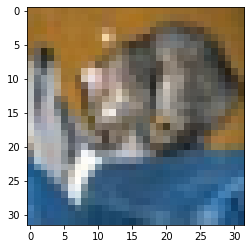

In [89]:
import matplotlib.pyplot as plt
plt.imshow(img[0])


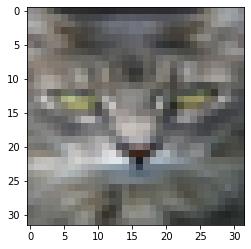

In [90]:
plt.imshow(X_train["data"][closest_label])

## Clasificacion usando k vecinos del espacio latente

Coordenadas a clasificar

In [7]:
# Train
X_trainLatent = encoder.predict(X_train["data"])
X_trainLabels = X_train["labels"]

# Test
X_testLatent = encoder.predict(X_test["data"])
X_testLabels = X_test["labels"]

Funcion de clasificacion

In [114]:
def kNeightboursLatent(toPredict, latentBBDD, k=1):
    neightbours = getDistances(latentBBDD, toPredict)
    neightbours.sort(key=lambda tup: tup[0])
    neightbours=neightbours[:k]
    votes = [label for (_, label, _) in neightbours]
    return max(set(votes), key=votes.count)   

In [93]:
n=2
print("Label: %d Prediction: %d" % (X_trainLabels[n], kNeightboursLatent(X_testLatent[n], latente, 15)))

Label: 9 Prediction: 0


In [118]:
aciertos, fallos = 0,0
for i in range(len(X_trainLatent)):
    if X_trainLabels[i] == kNeightboursLatent(X_trainLatent[i], latente, 15):
        aciertos+=1
    else:
        fallos+=1
    print("Aciertos: %d | Fallos: %d" %(aciertos, fallos), end="\r")

KeyboardInterrupt: 

Visualizacion de los vecinos reduciendo la dimensionalidad con PCA

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data=X_trainLatent
print(data.shape)
pca.fit(data)
x = pca.transform(data)
print(x.shape)

(50000, 512)
(50000, 2)


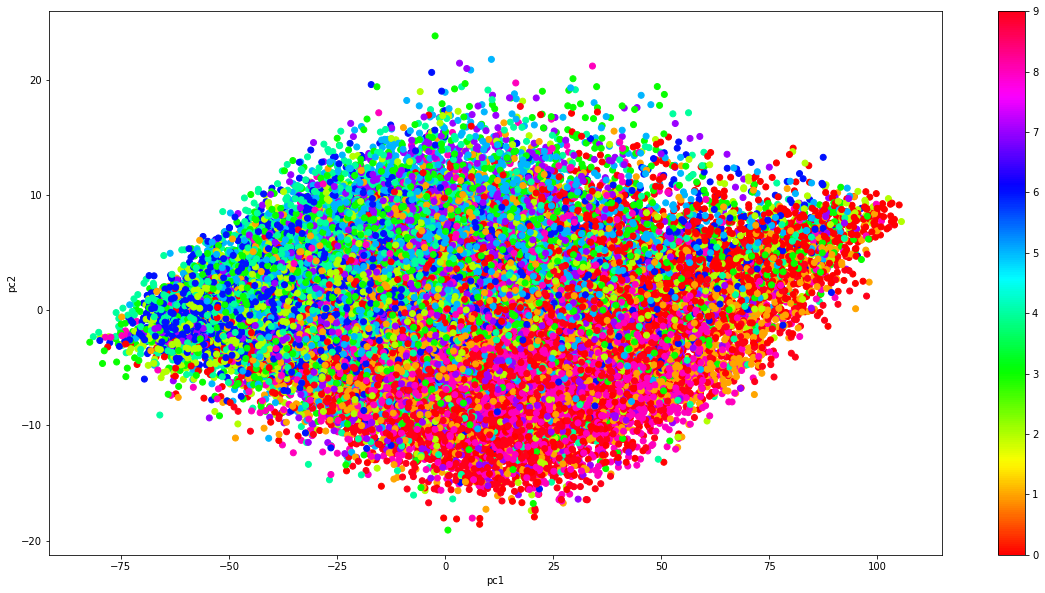

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.scatter(x[:,0],x[:,1],c=X_train["labels"], cmap='hsv')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.colorbar()
plt.show()
plt.close()

PCA de la distribucion pura

(50000, 512)
(50000, 2)


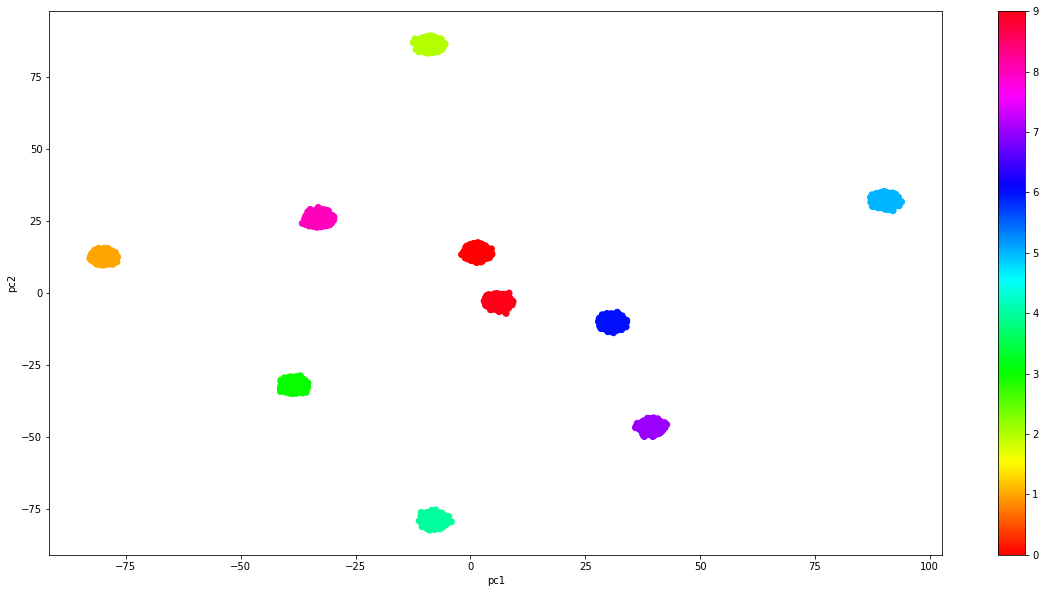

In [5]:
from sklearn.decomposition import PCA
from lib.genEJ import true_multivariate_sampler_tf
import numpy as np

pca = PCA(n_components=2)
data, labels= true_multivariate_sampler_tf(512, 50000, 10)
_, labels = np.where(labels == 1)
print(data.shape)
pca.fit(data)
x = pca.transform(data)
print(x.shape)

import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.scatter(x[:,0],x[:,1],c=labels, cmap='hsv')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.colorbar()
plt.show()
plt.close()

---------------------------------------------------------

5 imagenes mas cercanas:
Rank 0 label 3 dist 11.950635


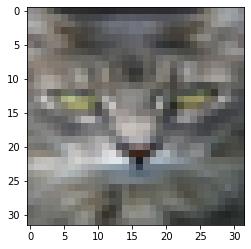

Rank 1 label 4 dist 12.170836


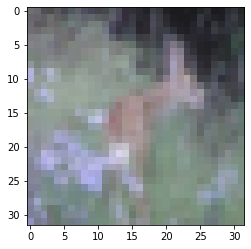

Rank 2 label 8 dist 12.225527


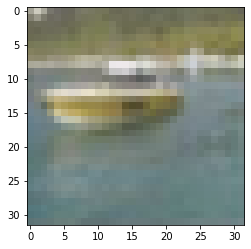

Rank 3 label 6 dist 12.312702


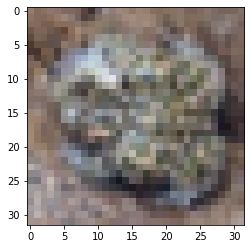

Rank 4 label 6 dist 12.36845


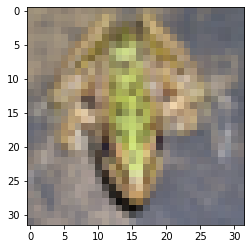

In [94]:
print("5 imagenes mas cercanas:")
for i in range(5):
    d = distances[i]
    print("Rank", i, "label", d[1], "dist", d[0])
    plt.imshow(X_train["data"][d[2]])
    plt.show()
    plt.close()